In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#from google.colab import drive
#drive.mount('/content/drive')
print(os.getcwd())  # full path: /Users/yuxiao/Library/CloudStorage/GoogleDrive-zyxdream6217@gmail.com/My Drive

/content
<built-in function listdir>


In [9]:
df = pd.read_excel('drive/My Drive/game data.xlsx', header = 0, usecols='A:C', dtype={'positions': str, 'move': str, 'explanation':str}, index_col=None)
#[1834 rows x 3 columns]
print(df)

                                              positions        move  \
0     rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...        1 e4   
1     rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...     1 ...e5   
2     rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...       2 Nf3   
3     rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...    2 ...Nc6   
4     r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...       3 Bc4   
...                                                 ...         ...   
1829  4r2k/q1r3pp/p2R1pnP/1p1Qp3/8/1P2P1B1/P4PP1/3R2...      33 Qe6   
1830  4r2k/q1r3pp/p2RQpnP/1p2p3/8/1P2P1B1/P4PP1/3R2K...   33 ...Rf8   
1831  5r1k/q1r3pp/p2RQpnP/1p2p3/8/1P2P1B1/P4PP1/3R2K...      34 Rd7   
1832  5r1k/q1rR2pp/p3QpnP/1p2p3/8/1P2P1B1/P4PP1/3R2K...  34 ...gxh6   
1833  5r1k/q1rR3p/p3Qpnp/1p2p3/8/1P2P1B1/P4PP1/3R2K1...      35 Bh4   

                                            explanation  
0     This is an excellent opening move. White ancho...  
1     Very good! Black insists 

In [ ]:
def format_template(row):
    s1 = row['positions']
    s2 = row['move']
    s3 = row['explanation']
    return f"<s>[INST] You are given notations of chess board positions and the next chess move. Explain why it is the best move. \
    ### Chess board positions: {s1} ### Next Move: {s2} ### Explanation: [/INST] {s3} </s>"

In [ ]:
testrow = dict()
testrow['positions'] = "2r1r1k1/qp3ppp/p5n1/3Rp3/1bN1Q3/4P1B1/PP3PPP/3R2K1 b - - 2 25"
testrow['move'] = "25 ...Bf8"
testrow['explanation'] = "Black transfers the exposed bishop to the defence. Against the immediate counterattack by 25 ...f5, \
White has a winning continuation in 26 Qxf5 Rxc4 27 Rd8! Rxd8 28 Rxd8+ Nf8 29 Qe6+  Kh8 30 Qxc4, when he is the exchange ahead. \
After Black’s actual move, he can answer 26 Nxe5 with 26 ...f6, winning the unfortunate knight. In addition, he contemplates the thrust 26 ...f5, which after 27 Qd3 (to protect the knight) 27...f4 occasions some trouble for the bishop."

format_template(testrow)

'<s>[INST] You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: 2r1r1k1/qp3ppp/p5n1/3Rp3/1bN1Q3/4P1B1/PP3PPP/3R2K1 b - - 2 25 ### Next Move: 25 ...Bf8 ### Explanation: [/INST] Black transfers the exposed bishop to the defence. Against the immediate counterattack by 25 ...f5, White has a winning continuation in 26 Qxf5 Rxc4 27 Rd8! Rxd8 28 Rxd8+ Nf8 29 Qe6+  Kh8 30 Qxc4, when he is the exchange ahead. After Black’s actual move, he can answer 26 Nxe5 with 26 ...f6, winning the unfortunate knight. In addition, he contemplates the thrust 26 ...f5, which after 27 Qd3 (to protect the knight) 27...f4 occasions some trouble for the bishop. </s>'

In [ ]:
new_df = pd.DataFrame()
new_df['text'] = df.apply(format_template, axis=1)
print(new_df['text'][0])

<s>[INST] You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1 ### Next Move: 1 e4 ### Explanation: [/INST] This is an excellent opening move. White anchors a pawn in the centre of the board and opens lines for his queen and a bishop. His next move, if he is allowed, will be 2 d4. The two pawns will then control four squares on the fifth rank, c5, d5, e5 and f5, and prevent Black from placing any of his pieces on those important squares.
How shall Black reply to White’s first move? He must not waste time considering meaningless moves, such as l ...h6 or l ...a6. These and other aimless moves do nothing toward developing the pieces, nor do they interfere with White’s threat to monopolize the centre. Black must fight for an equal share of the good squares. Black must dispute possession of the centre. Why all this stress on the centre? Why is it so 

In [ ]:
new_df.to_csv("game data template.csv")

In [ ]:
seqlens = new_df.apply(lambda x: len(x['text']), axis=1)

Freedman–Diaconis number of bins: 81


Text(0.5, 0, 'seq_lens')

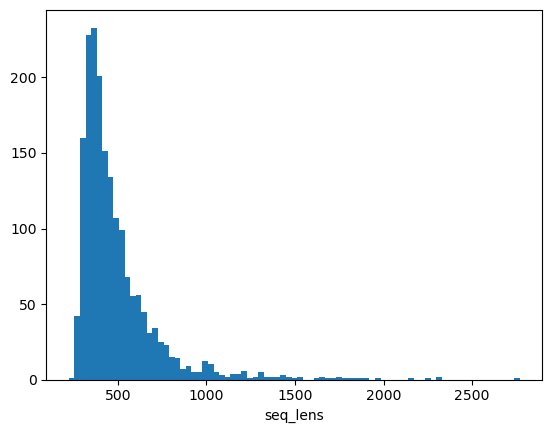

In [ ]:
q25, q75 = np.percentile(seqlens, [25, 75])
bin_width = 2 * (q75 - q25) * len(seqlens) ** (-1/3)
bins = round((seqlens.max() - seqlens.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(seqlens, bins=bins)
plt.xlabel("seq_lens")

In [ ]:
val = new_df.sample(n=20)
train = new_df.drop(val.index)

In [ ]:
print(len(train['text']))

1814


In [ ]:
val.to_csv("game data template validation.csv", index=False)
train.to_csv("game data template train.csv", index=False)

In [4]:
df_val = pd.read_csv('drive/My Drive/game data template validation.csv')
print(df_val)

                                                 text
0   <s>[INST] You are given notations of chess boa...
1   <s>[INST] You are given notations of chess boa...
2   <s>[INST] You are given notations of chess boa...
3   <s>[INST] You are given notations of chess boa...
4   <s>[INST] You are given notations of chess boa...
5   <s>[INST] You are given notations of chess boa...
6   <s>[INST] You are given notations of chess boa...
7   <s>[INST] You are given notations of chess boa...
8   <s>[INST] You are given notations of chess boa...
9   <s>[INST] You are given notations of chess boa...
10  <s>[INST] You are given notations of chess boa...
11  <s>[INST] You are given notations of chess boa...
12  <s>[INST] You are given notations of chess boa...
13  <s>[INST] You are given notations of chess boa...
14  <s>[INST] You are given notations of chess boa...
15  <s>[INST] You are given notations of chess boa...
16  <s>[INST] You are given notations of chess boa...
17  <s>[INST] You are given 

In [5]:
df_train = pd.read_csv('drive/My Drive/game data template train.csv')
#1814 rows
print(df_train)

                                                   text
0     <s>[INST] You are given notations of chess boa...
1     <s>[INST] You are given notations of chess boa...
2     <s>[INST] You are given notations of chess boa...
3     <s>[INST] You are given notations of chess boa...
4     <s>[INST] You are given notations of chess boa...
...                                                 ...
1809  <s>[INST] You are given notations of chess boa...
1810  <s>[INST] You are given notations of chess boa...
1811  <s>[INST] You are given notations of chess boa...
1812  <s>[INST] You are given notations of chess boa...
1813  <s>[INST] You are given notations of chess boa...

[1814 rows x 1 columns]


In [13]:
def split_q(row):
    start_at = len("<s>[INST]") + 1
    split_at = row['text'].index("[/INST]") - len("### Explanation: ")
    return row['text'][start_at:split_at]

def split_a(row):
    split_at = row['text'].index("[/INST]") + len("[/INST]")
    return row['text'][split_at+1:-5]

testrow = dict()
testrow["text"] = "<s>[INST] You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1 ### Next Move: 1 ...e5 ### Explanation: [/INST] Very good! Black insists on a fair share of the centre. He fixes a pawn firmly there and liberates two of his pieces. </s>"
print(split_q(testrow))
print(split_a(testrow))

testrow2 = dict()
testrow2["text"] = "<s>[INST] You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: 8/1p3ppp/4p3/1k6/3PpP2/4P2P/1bK3P1/8 w - - 0 35 ### Next Move: 35 Kxb2 ### Explanation: [/INST] The only move. </s>"
print(split_q(testrow2))
print(split_a(testrow2))

You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1 ### Next Move: 1 ...e5 
Very good! Black insists on a fair share of the centre. He fixes a pawn firmly there and liberates two of his pieces.
You are given notations of chess board positions and the next chess move. Explain why it is the best move.     ### Chess board positions: 8/1p3ppp/4p3/1k6/3PpP2/4P2P/1bK3P1/8 w - - 0 35 ### Next Move: 35 Kxb2 
The only move.


In [14]:
df_val["question"] = df_val.apply(split_q, axis=1)
df_val["answer"] = df_val.apply(split_a, axis=1)
df_train["question"] = df_train.apply(split_q, axis=1)
df_train["answer"] = df_train.apply(split_a, axis=1)

In [19]:
df_val.drop(labels="text", axis=1, inplace=True)

In [20]:
df_train.drop(labels="text", axis=1, inplace=True)

In [23]:
df_val

,question,answer
0,You are given notations of chess board positio...,"And Black must dance to the tune, by bringing ..."
1,You are given notations of chess board positio...,The only move.
2,You are given notations of chess board positio...,On the alternative 11 ...h6 White wins by 12 B...
3,You are given notations of chess board positio...,Interfering with the rook’s action on the open...
4,You are given notations of chess board positio...,Another quiet move which liberates one bishop ...
5,You are given notations of chess board positio...,"After the recapture 20 ...Qxc6, there comes 21..."
6,You are given notations of chess board positio...,Hoping to get some peace by effecting an excha...
7,You are given notations of chess board positio...,"Black wants to maintain a pawn in the centre, ..."
8,You are given notations of chess board positio...,"There is no direct threat in this queen move, ..."
9,You are given notations of chess board positio...,"The knight takes up a good post, extending pow..."


In [21]:
df_val.to_csv("drive/My Drive/game data qa template val.csv", index=False)
df_train.to_csv("drive/My Drive/game data qa template train.csv", index=False)